<a href="https://colab.research.google.com/github/MysteriousHo-Oh123/AI-Research-/blob/main/Binary_Alzheimer's_Disease_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/MysteriousHo-Oh123/AI-Research-'

Cloning into 'AI-Research-'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 75 (delta 33), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [ ]:
!ls

AI-Research-  sample_data


In [ ]:
import pandas as pd

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, recall_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('AI-Research-/data/oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df = df.drop_duplicates(subset="Subject ID", keep="last")
df = df.reset_index(drop=True)
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
1,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
2,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
3,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
4,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279


In [ ]:
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) 
df['Group'] = df['Group'].replace(['Converted'], ['Demented'])
df['Group'] = df['Group'].replace(['Nondemented', 'Demented'], [0,1])
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)

df.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
1,OAS2_0002,1,1895,1,80,12,NaN,22.0,0.5,1698,0.701,1.034
2,OAS2_0004,0,538,0,90,18,3.0,27.0,0.0,1200,0.718,1.462
3,OAS2_0005,0,1603,1,85,12,4.0,30.0,0.0,1699,0.705,1.033
4,OAS2_0007,1,1281,1,75,16,NaN,27.0,1.0,1372,0.710,1.279


In [ ]:
educ_mean = df['EDUC'].mean()
ses_mean = df['SES'].mean()
mmse_mean = df['MMSE'].mean()
cdr_mean = df['CDR'].mean()
etiv_mean = df['eTIV'].mean()
nwbw_mean = df['nWBV'].mean()
asf_mean = df['ASF'].mean()

educ_median = df['EDUC'].median()
ses_median = df['SES'].median()
mmse_median = df['MMSE'].median()
cdr_median = df['CDR'].median()
etiv_median = df['eTIV'].median()
nwbw_median = df['nWBV'].median()
asf_median = df['ASF'].median()

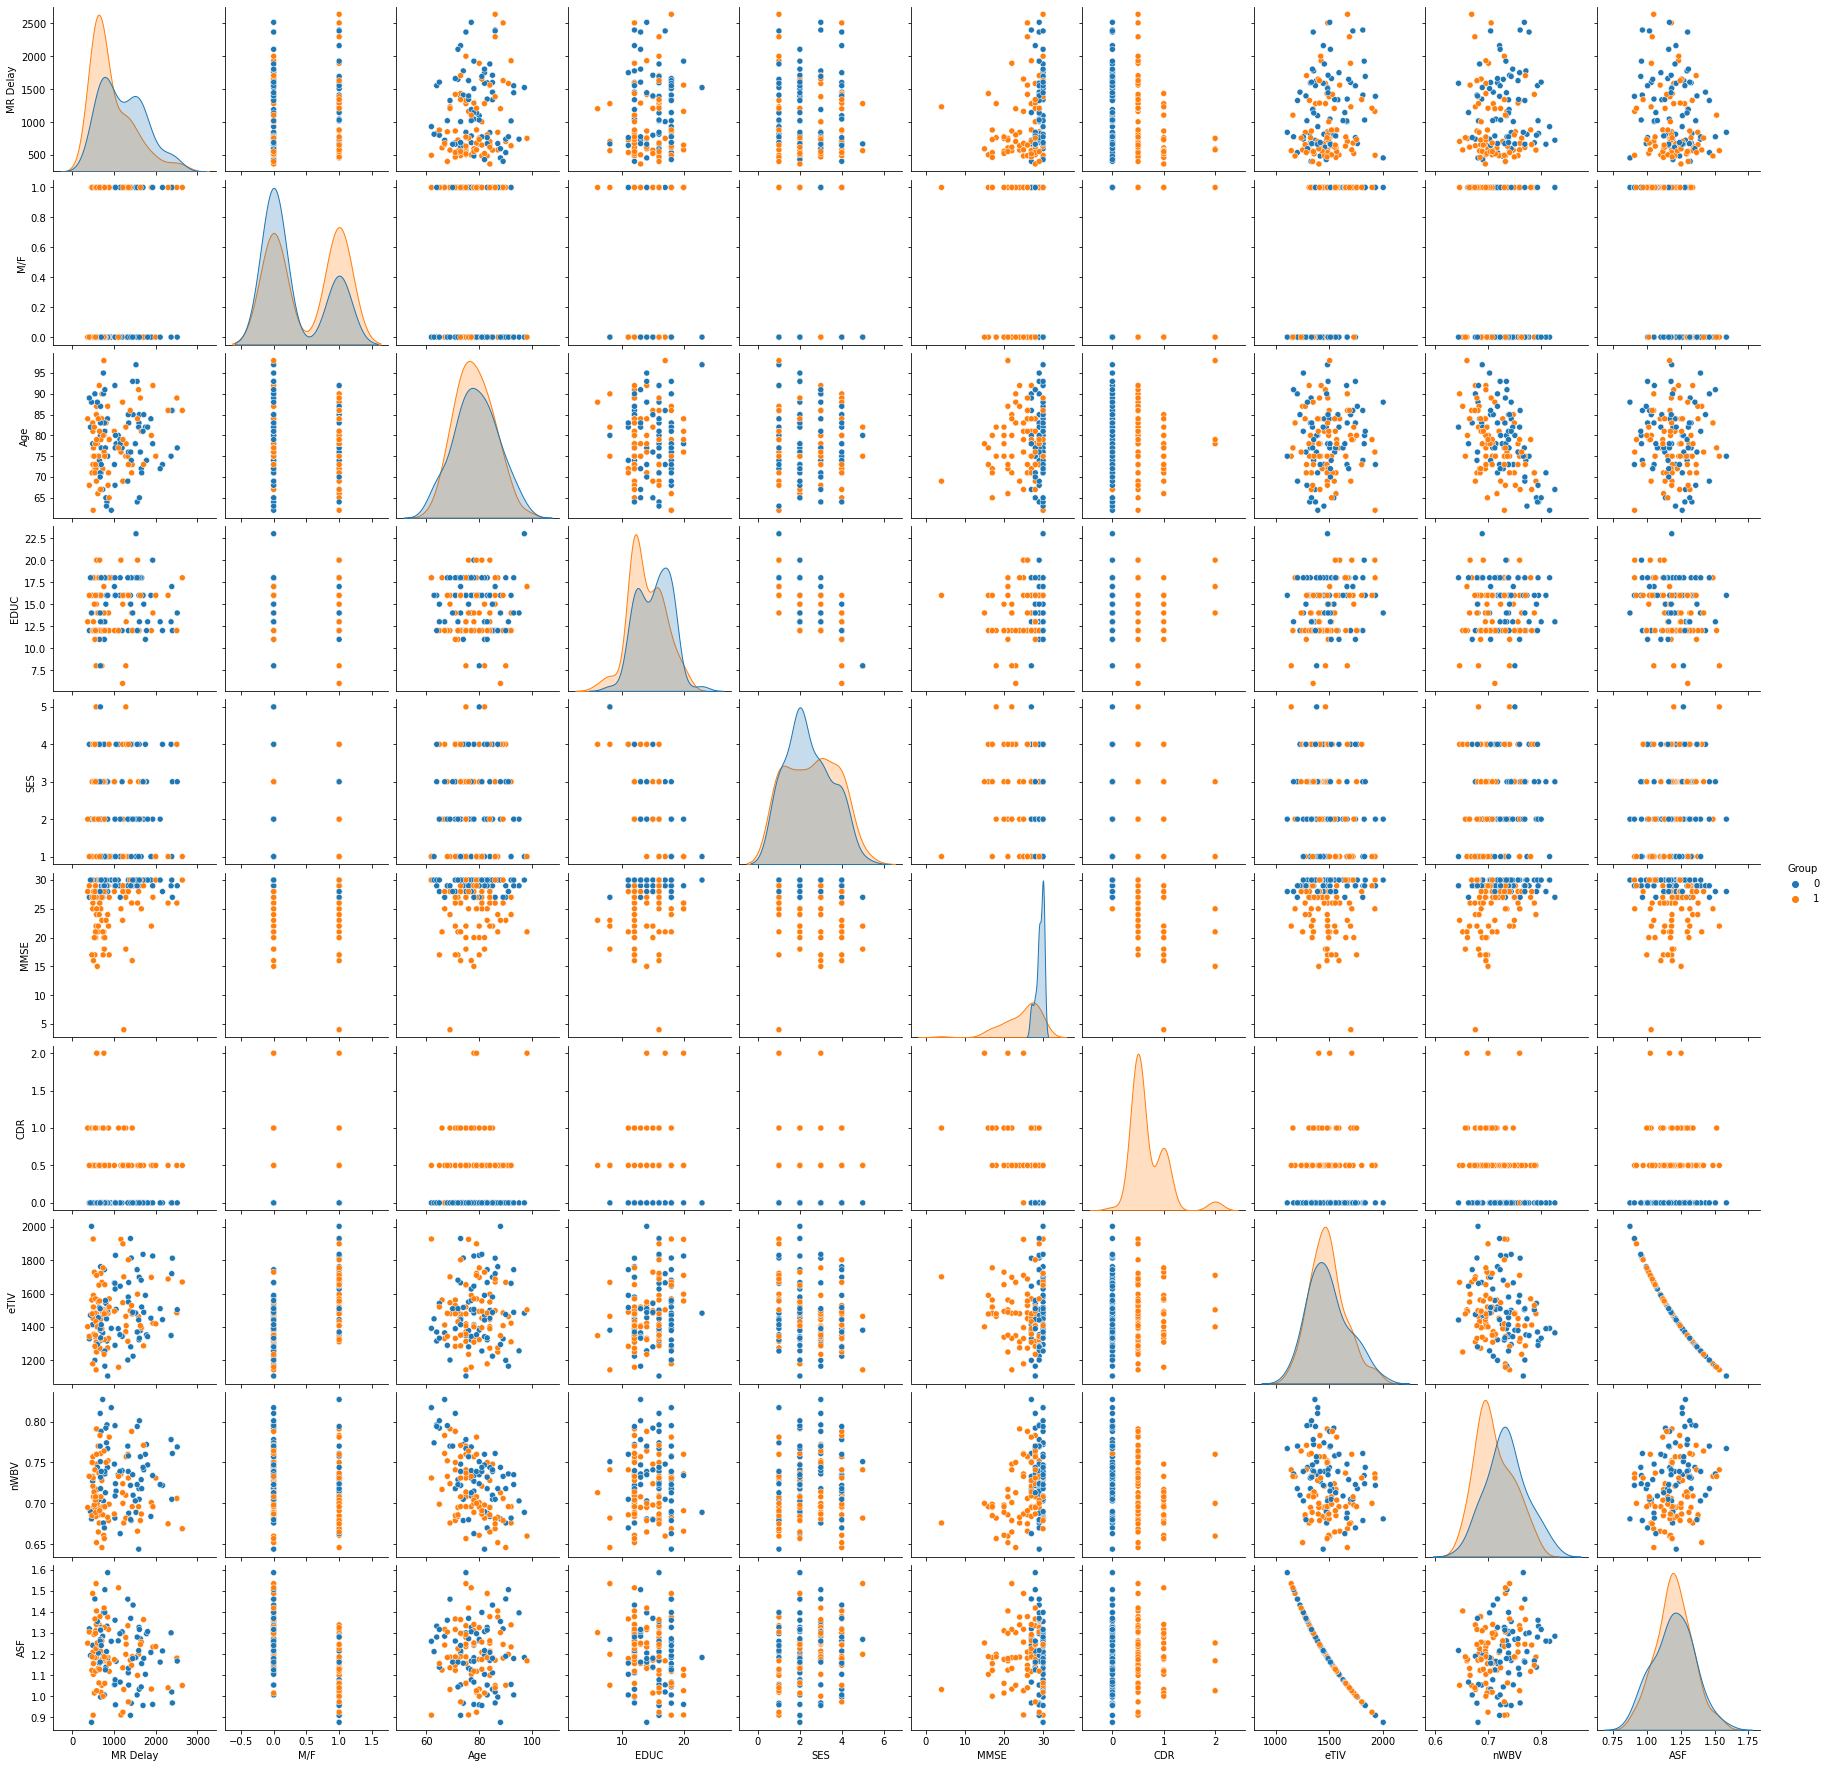

In [ ]:
sns.reset_orig
sns.pairplot(df, hue='Group')

In [ ]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

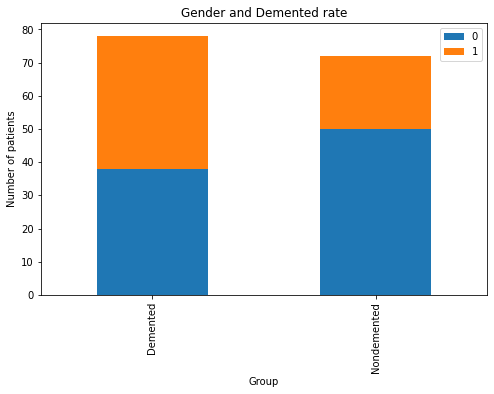

In [ ]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

Males are more likely to get Alzheimer's, but females are more likely to develop Alzheimer's? Edit: Most likely not true anymore; It seems like men are more likely to be correctly diagnosed with Alzheimer's on the first scannings.

This implies that women are more likely to be misdiagnosed or at least have symptoms of Alzheimer's masked, potentially due to better verbal reasoning skills or other better mental status. 

(15.3, 30.0)

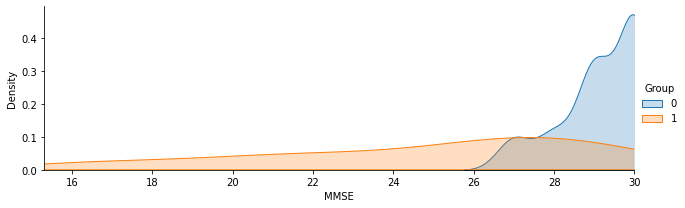

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

Non demented people have a higher MMSE score on average, converted have a higher MMSE score than demented on average but lower than non demented (as expected, combining with our previous graph and see that this does suggest that women have their risk masked?). Demented have a wide range of values for MMSE.

(0.0, 0.16)

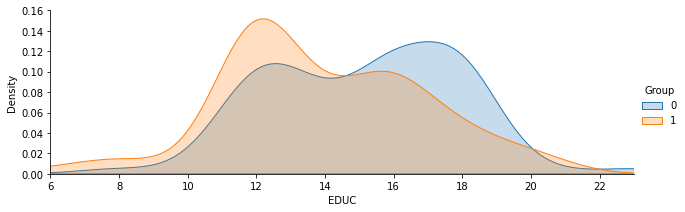

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

Weak correlation (lack of signal), but typically patients with dementia have lower education, but remember that EDUC has low power to seperate 1 and 0. Check with converted.

(50.0, 100.0)

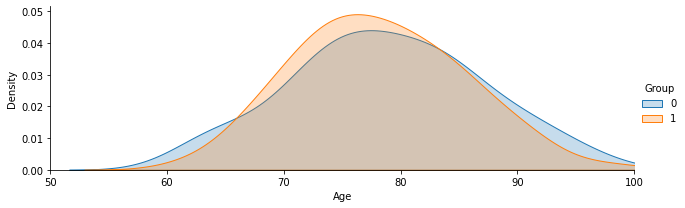

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

Demented and converted patients typically exhibit a larger range of age values and are older on average, compared to non demented patients

Use pairplot to do this https://seaborn.pydata.org/generated/seaborn.pairplot.html

(0.5, 2.0)

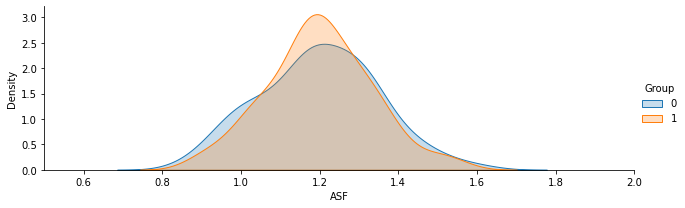

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

(900.0, 2100.0)

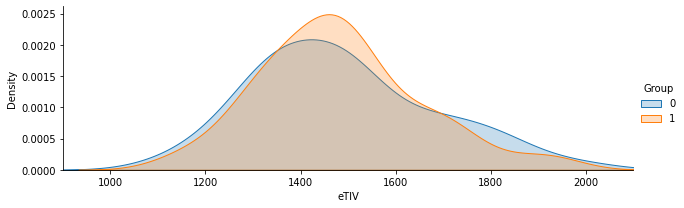

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

Demented and converted patients have a lower intercranial volume compared to non demented patients.

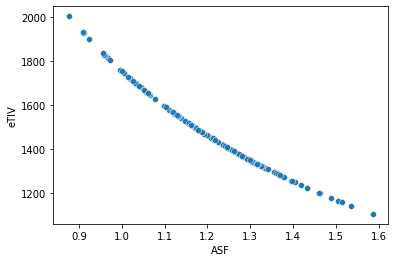

In [ ]:
sns.scatterplot(data=df, x="ASF", y="eTIV")

Atlas Scaling Factor and estimated total intercranial volume demonstrate a negative correlation 

(0.6, 0.9)

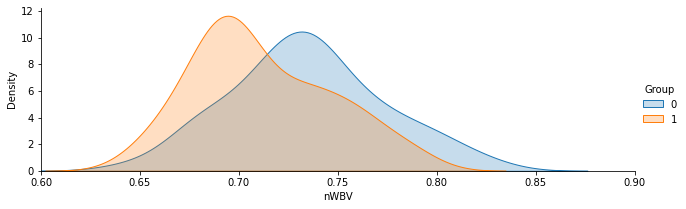

In [ ]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6, 0.9)

The brain volume of non demented patients on average are higher than both demented patients and converted patients. Converted patients demonstrated a greater range than demented patients.

EDUC = Years of Education 
SES = Socioeconomic Status
MMSE = Mini Medical State Exam
CDR = Clinical Dimentia Rating
eTIV = Estimated Total Intercranial Volume
nWBV = Normalize Whole Brain Volume
ASF = Atlas Scaling Factor

In [ ]:
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          1
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df['MMSE'] = df['MMSE'].interpolate(method='linear')

In [ ]:
imp_proxydf = df[['EDUC','SES']]
imp_proxydf

,EDUC,SES
0,14,2.0
1,12,NaN
2,18,3.0
3,12,4.0
4,16,NaN
...,...,...
145,12,NaN
146,13,2.0
147,16,3.0
148,16,1.0


In [ ]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(imp_proxydf)
imp_trans = np.round(imp.transform(imp_proxydf))

In [ ]:
imp_proxydf = pd.DataFrame(imp_trans, columns=imp_proxydf.columns)
imp_proxydf

df[['SES']] = imp_proxydf[['SES']] 

In [ ]:
pd.isnull(df).sum() 

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
perf_metrics = []

In [ ]:
X = np.array(df['MMSE']).reshape(-1, 1)
Y = np.array(df['Group']).reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Bootstrap sampling (for loop with different random states)

In [ ]:
regr = LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

fpr, tpr, thresh = roc_curve(Y_test, Y_pred)

auc = roc_auc_score(Y_test, Y_pred, multi_class='ovr')
print('AUC: %.3f' % auc)
name_1 = 'Linear Regression w/MMSE'

AUC: 0.884


You can try to plot AUC; Here's an instance of ROC https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html; 

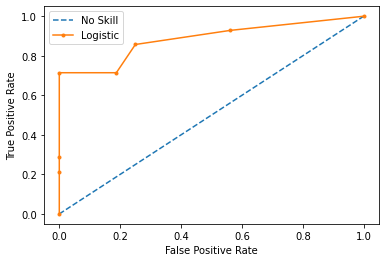

In [ ]:
fpr_linreg, tpr_linreg, thresholds_linreg = roc_curve(Y_test, Y_pred, pos_label=1)

plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

plt.plot(fpr_linreg, tpr_linreg, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()


In [ ]:
X_2 = df[['MR Delay', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]
Y_2 = df['Group'].values

X_train, X_test, Y_train, Y_test = train_test_split(
    X_2, Y_2, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

logReg = LogisticRegression(max_iter=2000, random_state=1)

solvers = ['newton-cg', 'lbfgs', 'sag', 'saga']
penalty = ['l2', 'none']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logReg, param_grid=grid, scoring='accuracy', n_jobs=-1, cv=cv, error_score=0)
grid_result = grid_search.fit(X_train_scaled, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.863889 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.850000 (0.084437) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.850000 (0.084437) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.855556 (0.085887) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.855556 (0.085887) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.850000 (0.084437) with: {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}
0.850000 (0.084437) with: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
0.850000 (0.084437) with: {'C': 100, 'penalty': 'none', 'solver': 'sag'}
0.852778 (0.085210) with: {'C': 100, 'penalty': 'none', 'solver': 'saga'}
0.863889 (0.087357) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.863889 (0.087357) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.863889 (0.087357) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.863889 (0.087357) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.850000 (0.084437) with: {'C': 10, 'penalty':

Best accuracy on validation set is: 0.875
Test accuracy with best C parameter is 0.6333333333333333
Test recall with the best C parameter is 0.8333333333333334
Test AUC with the best C parameter is 0.8240740740740741


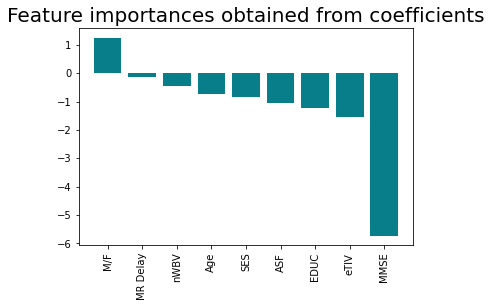

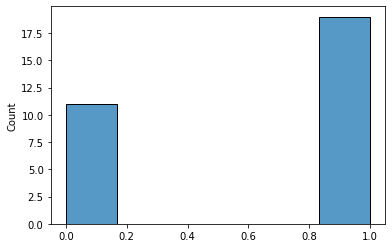

In [ ]:
BestLogReg = LogisticRegression(**grid_result.best_params_)

BestLogReg.fit(X_train_scaled, Y_train)

train_score = BestLogReg.score(X_train_scaled, Y_train)
logit_predict = BestLogReg.predict(X_test_scaled)
logit_predict_proba = BestLogReg.predict_proba(X_test_scaled)
logit_predict_proba = np.delete(logit_predict_proba, -1, axis=1)
test_score = accuracy_score(Y_test, logit_predict)
test_recall = recall_score(Y_test, logit_predict, pos_label=1)
fpr_logit, tpr_logit, thresholds = roc_curve(Y_test, logit_predict_proba, pos_label=1)
test_auc = metrics.auc(tpr_logit, fpr_logit)
print("Best accuracy on validation set is:", train_score)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

# name_2 = 'Logistic Regression'
# perf_metrics.append([name_2, test_score, test_recall, test_auc, fpr_logit, tpr_logit, thresholds])


importances = pd.DataFrame(data={
     'Attribute': X_train.columns,
    'Importance': BestLogReg.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

sns.histplot(data=logit_predict)

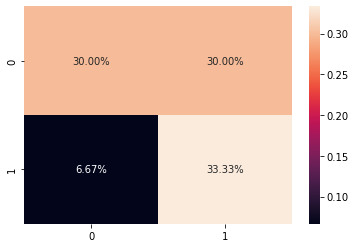

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, logit_predict)

sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

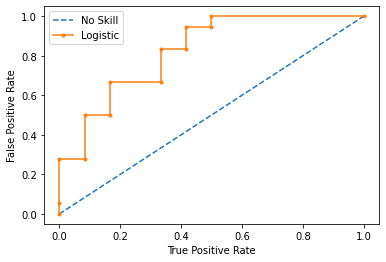

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

plt.plot(tpr_logit, fpr_logit, marker='.', label='Logistic')

plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

plt.legend()

plt.show()

In [ ]:
for md in range(1, 7): 
  BestDT = DecisionTreeClassifier(max_depth=md).fit(X_train_scaled, Y_train)

  test_score = BestDT.score(X_test_scaled, Y_test)
  prediction = BestDT.predict(X_test_scaled)
  test_recall = recall_score(Y_test, prediction, pos_label=1, average='weighted')
  fpr, tpr, thresholds = roc_curve(Y_test, prediction, pos_label=1)
  test_auc = metrics.auc(fpr, tpr)
  print("Parameter for the maximum depth is: \n", md)
  print("Test accuracy with best parameter is \n", test_score)
  print("Test recall with best parameters is \n", test_recall)
  print("Test AUC with the best parameter is \n", test_auc)
  print(BestDT.feature_importances_)
  print("-----------")
 


#name_3 = 'Decision Tree'
#perf_metrics.append([name_3, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Parameter for the maximum depth is: 
 1
Test accuracy with best parameter is 
 0.6333333333333333
Test recall with best parameters is 
 0.6333333333333333
Test AUC with the best parameter is 
 0.6666666666666667
[0. 0. 0. 0. 0. 1. 0. 0. 0.]
-----------
Parameter for the maximum depth is: 
 2
Test accuracy with best parameter is 
 0.6333333333333333
Test recall with best parameters is 
 0.6333333333333333
Test AUC with the best parameter is 
 0.6666666666666667
[0.05394077 0.         0.         0.06039874 0.         0.88566049
 0.         0.         0.        ]
-----------
Parameter for the maximum depth is: 
 3
Test accuracy with best parameter is 
 0.5666666666666667
Test recall with best parameters is 
 0.5666666666666667
Test AUC with the best parameter is 
 0.5833333333333333
[0.04394064 0.09234716 0.05643437 0.04920135 0.         0.72146697
 0.         0.0366095  0.        ]
-----------
Parameter for the maximum depth is: 
 4
Test accuracy with best parameter is 
 0.5
Test recall 

Todo

1. Use logReg, DTrees, and MLP
2. Find optimal Alpha and hiddenlayer

Small alpha means moves slowly towards Gradient Descent so for a small alpha, increase max iter

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=200)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 10, 'hidden_layer_sizes': (100,)}
0.800 (+/-0.108) for {'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50)}
0.767 (+/-0.094) for {'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50)}
0.792 (+/-0.131) for {'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
0.783 (+/-0.085) for {'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50)}
0.817 (+/-0.165) for {'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50)}
0.783 (+/-0.118) for {'alpha': 0.001, 'hidden_layer_sizes': (100,)}
0.783 (+/-0.085) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50)}
0.792 (+/-0.143) for {'alpha': 0.01, 'hidden_layer_sizes': (50, 100, 50)}
0.808 (+/-0.085) for {'alpha': 0.01, 'hidden_layer_sizes': (100,)}
0.783 (+/-0.125) for {'alpha': 0.1, 'hidden_layer_sizes': (50, 50, 50)}
0.783 (+/-0.085) for {'alpha': 0.1, 'hidden_layer_sizes': (50, 100, 50)}
0.783 (+/-0.085) for {'alpha': 0.1, 'hidden_layer_sizes': (100,)}
0.792 (+/-0.131) for {'alpha': 1, 'hidden_layer_sizes': (50, 50, 50)}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(80,),(90,), (100,), (110,), (120,)],
    'alpha': [10],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 10, 'hidden_layer_sizes': (90,)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (80,)}
0.833 (+/-0.103) for {'alpha': 10, 'hidden_layer_sizes': (90,)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (100,)}
0.817 (+/-0.125) for {'alpha': 10, 'hidden_layer_sizes': (110,)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (120,)}


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(100,), (100,100), (100,100,100,)],
    'alpha': [10],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 10, 'hidden_layer_sizes': (100,)}
0.833 (+/-0.103) for {'alpha': 10, 'hidden_layer_sizes': (100,)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (100, 100)}
0.708 (+/-0.232) for {'alpha': 10, 'hidden_layer_sizes': (100, 100, 100)}


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(80, 80, 80,), (90, 90, 90,), (100, 100, 100,), (110, 110, 110,), (120, 120, 120,)],
    'alpha': [10],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 10, 'hidden_layer_sizes': (100, 100, 100)}
0.733 (+/-0.287) for {'alpha': 10, 'hidden_layer_sizes': (80, 80, 80)}
0.700 (+/-0.227) for {'alpha': 10, 'hidden_layer_sizes': (90, 90, 90)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (100, 100, 100)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (110, 110, 110)}
0.708 (+/-0.232) for {'alpha': 10, 'hidden_layer_sizes': (120, 120, 120)}


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(90, 90, 90)],
    'alpha': [0.01, 0.1, 1, 10, 100],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 10, 'hidden_layer_sizes': (90, 90, 90)}
0.783 (+/-0.125) for {'alpha': 0.01, 'hidden_layer_sizes': (90, 90, 90)}
0.750 (+/-0.071) for {'alpha': 0.1, 'hidden_layer_sizes': (90, 90, 90)}
0.758 (+/-0.085) for {'alpha': 1, 'hidden_layer_sizes': (90, 90, 90)}
0.808 (+/-0.125) for {'alpha': 10, 'hidden_layer_sizes': (90, 90, 90)}
0.550 (+/-0.000) for {'alpha': 100, 'hidden_layer_sizes': (90, 90, 90)}


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)

parameter_space = {
    'hidden_layer_sizes': [(90, 90, 90)],
    'alpha': [10, 20, 30, 40, 50],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 10, 'hidden_layer_sizes': (90, 90, 90)}
0.825 (+/-0.122) for {'alpha': 10, 'hidden_layer_sizes': (90, 90, 90)}
0.550 (+/-0.000) for {'alpha': 20, 'hidden_layer_sizes': (90, 90, 90)}
0.550 (+/-0.000) for {'alpha': 30, 'hidden_layer_sizes': (90, 90, 90)}
0.550 (+/-0.000) for {'alpha': 40, 'hidden_layer_sizes': (90, 90, 90)}
0.550 (+/-0.000) for {'alpha': 50, 'hidden_layer_sizes': (90, 90, 90)}


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)

parameter_space = {
    'hidden_layer_sizes': [(90, 90, 90)],
    'alpha': [5, 6, 7, 8, 9, 10],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, Y_train)

print('Best parameters found:\n', clf.best_params_)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'alpha': 8, 'hidden_layer_sizes': (90, 90, 90)}
0.808 (+/-0.085) for {'alpha': 5, 'hidden_layer_sizes': (90, 90, 90)}
0.808 (+/-0.143) for {'alpha': 6, 'hidden_layer_sizes': (90, 90, 90)}
0.825 (+/-0.122) for {'alpha': 7, 'hidden_layer_sizes': (90, 90, 90)}
0.833 (+/-0.094) for {'alpha': 8, 'hidden_layer_sizes': (90, 90, 90)}
0.825 (+/-0.108) for {'alpha': 9, 'hidden_layer_sizes': (90, 90, 90)}
0.708 (+/-0.232) for {'alpha': 10, 'hidden_layer_sizes': (90, 90, 90)}


In [ ]:
y_pred = clf.predict(X_test_scaled)

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.50      0.62        18
           1       0.53      0.83      0.65        12

    accuracy                           0.63        30
   macro avg       0.67      0.67      0.63        30
weighted avg       0.70      0.63      0.63        30



Don't overkill on code; once done with above, that's all. Explain each code block: that's your paper. 

Important note: Use Pairplot for sns

For next time: 